# Introdução

A rede de academias Model Fitness está desenvolvendo uma estratégia de interação com o cliente baseados em dados analíticos.

Um dos problemas mais comuns que academias e outros serviços enfrentam é a rotatividade de clientes. Como você sabe se um cliente não está mais com você? Você pode calcular a rotatividade baseado nas pessoas que se livram das suas contas ou não renovam seus contratos. No entanto, às vezes não é óbvio que um cliente saiu: eles podem sair de fininho.

O prosente trabalho tem por finalidade


*	Aprender a predizer a probabilidade de rotatividade (para o mês seguinte) para cada cliente
*	Elaborar retratos de usuários típicos: selecionar os grupos mais marcantes e descrever suas principais características
*	Analisar os fatores que mais impactam a rotatividade
*	Tirar conclusões básicas e desenvolver recomendações sobre como melhorar o serviço de clientes:
>> *	Identificar grupos alvo
>> *	Sugerir medidas para diminuir a rotatividade
>> *	Descrever qualquer outro padrão que for visto com respeito às interações com clientes.


# Os dados

O conjunto de dados inclui os seguintes campos:

*	'Churn' — a rotatividade do mês em questão
## Campos de dados atuais:
> ###	Dados do mês anterior:
>> *	'gender'
>> *	'Near_Location' — se o cliente morar ou trabalhar na vizinhança onde a academia está localizada
>> *	'Partner' — se o usuário for um funcionário de uma companhia parceira (a academia tem empresas parceiras cujos funcionários conseguem descontos; nesses casos, a academia armazena informações sobre clientes de são funcionários)
>> *	Promo_friends — se o cliente originalmente se inscreveu através de uma oferta "traga um amigo" eles normalmente usam o código de promoção do amigo quando pagam pela primeira filiação)
>> *	'Phone' — se o usuário fornece o seu número de telefone
>> *	'age' (idade)
>> *	'Lifetime' — o tempo (em meses) desde a primeira vez que o cliente veio à academia

## Dados do log de frequência e compras e dados sobre status de filiação atual
>> *	'Contract_period' — 1 mês, 3 meses, 6 meses, ou um ano
>> *	'Month_to_end_contract' — os meses remanescentes até que o contrato expira
>> *	'Group_visits' — se o cliente participa de sessões em grupo
>> *	'Avg_class_frequency_total' — frequência média de idas por semana por toda a vida do cliente
>> *	'Avg_class_frequency_current_month' — frequência média de visitas por semana durante o mês corrente
>> *	'Avg_additional_charges_total' — a quantidade total de dinheiro gasto em outros serviços da academia: café, artigos esportivos, cosméticos, massagem, etc.


# Importando Bibliotecas

In [10]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set()

from sklearn.ensemble import GradientBoostingClassifier 
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings("ignore")


# Importando Dataset

In [11]:
try:
    df = pd.read_csv(r'gym_churn_us.csv')
except:
    df= pd.read_csv(r'/datasets/gym_churn_us.csv')

# Visualizando Dados

In [12]:
display(df.head())
print()
print('='*130)
print(df.info())
print()
print('='*130)
print(df.describe())
print()
print('='*130)
print(f'Dados duplicados:{df.duplicated().sum()}')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   floa

Até o presente momento, as informações se encontram normais. Nada fora do padrão, ou algo exorbitante.


Os dados não possuem valores ausentes. Nem linhas duplicadas.

# Análise Exploratória de Dados

In [13]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [14]:
df.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [15]:
print("A quantidade dos valores de churn dentro do Dataset é de:")
print((df['Churn'].value_counts()/df.shape[0]).round(2).apply(lambda x: f"{x:.2%}"))


 

A quantidade dos valores de churn dentro do Dataset é de:
0    73.00%
1    27.00%
Name: Churn, dtype: object


Percebemos que a proporção de saídas de clientes é de 27% no mês, o que é muito, quase 1/3 da clientela. 

Abaixo serão analisadas as variáveis Quantitativas Discretas e Continuas, separadamente.

In [16]:
#Separando o Dataset em variáveis Quantitativas Discretas e Continuas

discrete = df.drop(['Avg_additional_charges_total', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Age', 'Lifetime', 'Month_to_end_contract'], axis=1)
continuous = df[['Avg_additional_charges_total', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month' , 'Age', 'Lifetime', 'Month_to_end_contract']]



<Figure size 1000x800 with 0 Axes>

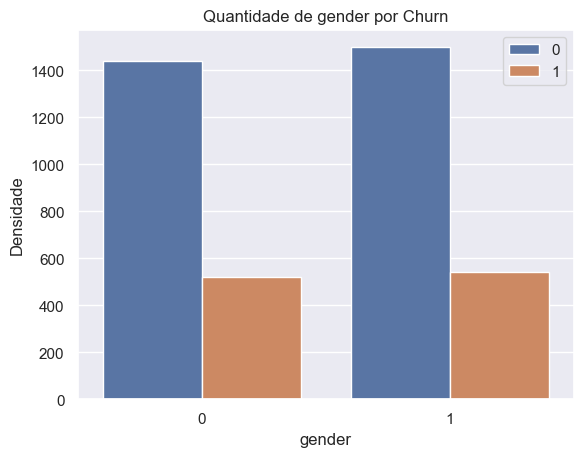

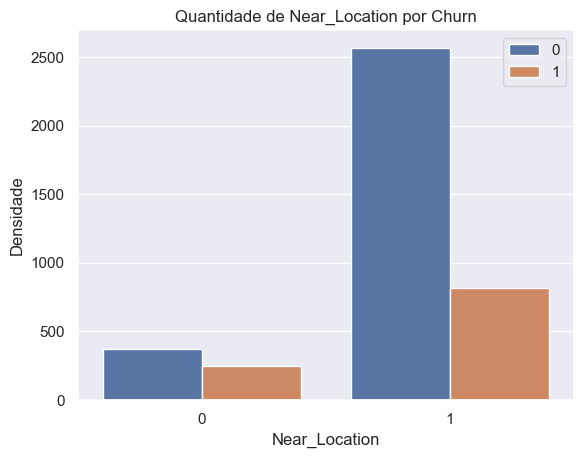

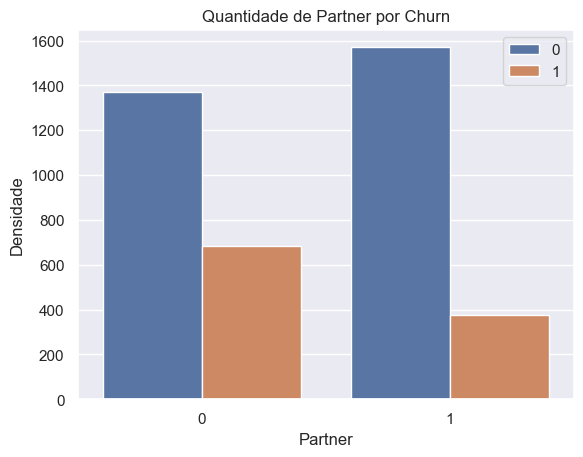

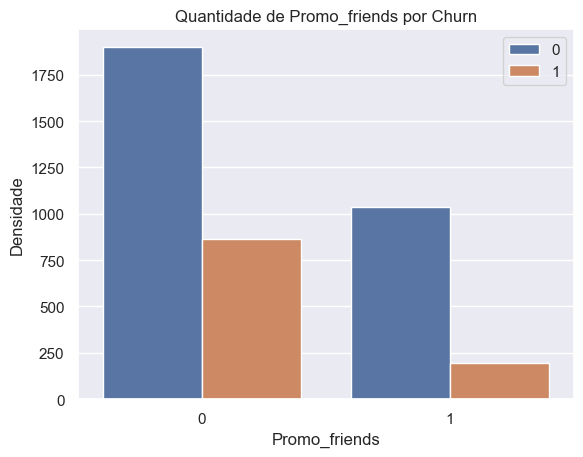

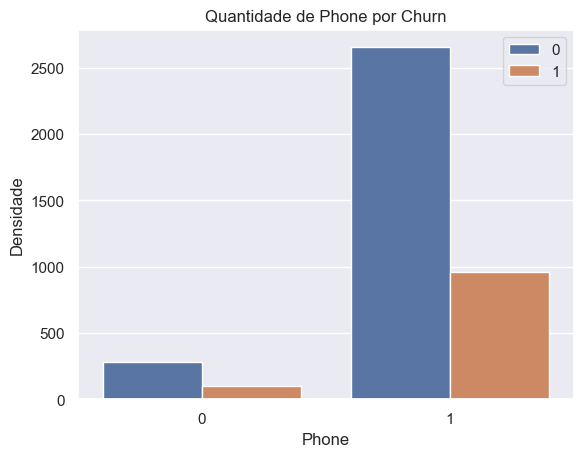

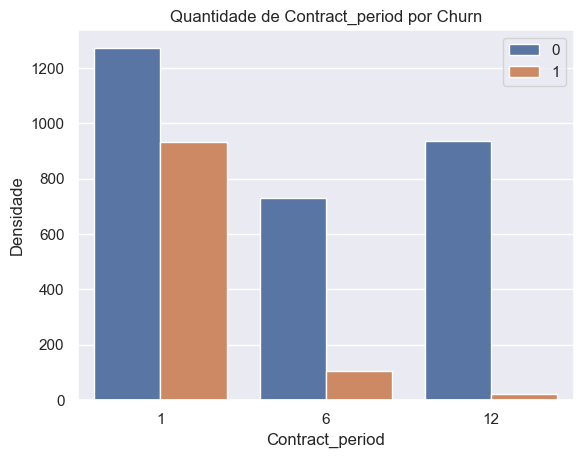

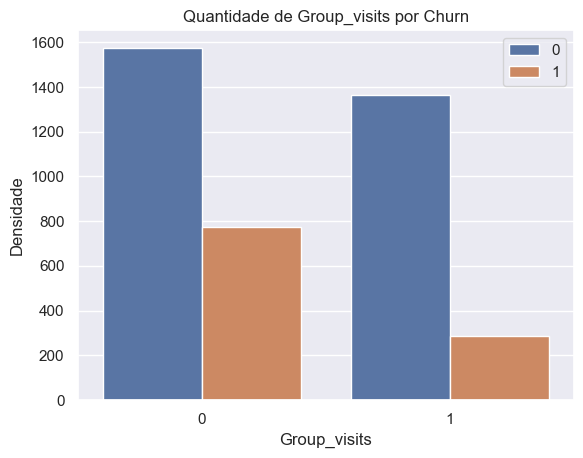

In [17]:
#Plotando a contagem das Vairáveis Quantitativas Discretas

plt.figure(figsize=(10,8))



for column in discrete.drop(['Churn'], axis=1).columns:
    fig, ax = plt.subplots()
    sns.countplot(data=df, x=column, hue="Churn")

    ax.set_title(f'Quantidade de {column} por Churn')
    ax.set_xlabel(column)
    ax.set_ylabel('Densidade')
    
    ax.legend()
    
    plt.show()


As Variáveis Discretas não mostram muito, apenas valores absolutos a respeito dos dados, dados com a maior quantidade de clientes tendem a ter maiores quantidades de saída também. Mas pode se perceber que essa é uma academia onde os maior número de frequentadores moram perto dela, ou seja, a maioria tem fácil acesso. 

In [18]:
#Plotando as Variáveis Quantitativas Continuas


churn_list= df['Churn'].unique()

for col in continuous:
    fig = px.histogram(df, 
                       x=df[col], 
                       color='Churn',
                       opacity=0.60, 
                       marginal='box',
                       histnorm='probability density', 
                       title="Distribuição de {}".format(col),
                       width = 800,
                       height= 600,
                       color_discrete_map={churn_list[0]:'blue',
                                           churn_list[1]:'orange'
                                           })
    fig.show()

Podemos observar que as variáveis "Lifetime", "Avg_class_frequency_total", "Avg_class_frequency_current_month", "Month_to_end_contract" são as variáveis onde encontramos as maiores saídas em seus valores menores. 

Posto isso, vemos que as pessoas que desistem desistem no começo (Lifetime), frequentam pouco a academia("Avg_class_frequency_total", "Avg_class_frequency_current_month") e contratam o pacote mensal ou estão no final do contrato (Month_to_end_contract) o que é corroborado pela variável Contract_Period.

Em consequência disso, a diminuição de receita é maior, como podemos ver nos números de "Avg_additional_charges_total".

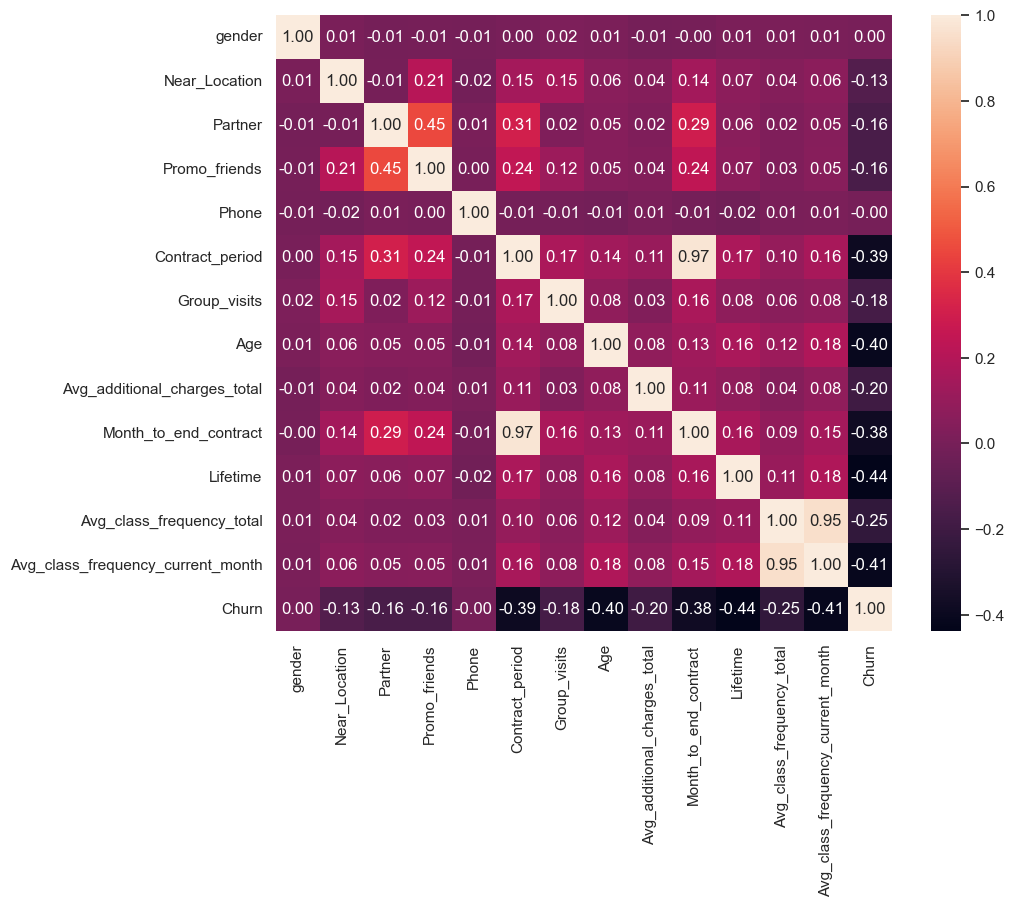

In [19]:
#Plotando Heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),
            annot=True,
            square=True,
            fmt=".2f",
            linewidths=0);




Podemos observar que há correlações negativas com a coluna 'Churn', que é a coluna alvo desse estudo, com as seguintes colunas: 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_current_month', 'Age' e 'Contract_period'.

A correlação negativa nos mostra que elas tem uma os valores se movem um direção diametralmente opostas, ou seja, são antagônicas. 

Temos com isso a coluna 'Lifetime' a que possui a maior correlação com a nossa variável alvo.

## Iniciando as classificações e previsões.

In [20]:
X = df.drop('Churn', axis= 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
column_names = [f"Variable_{i+1}" for i in range(X_train.shape[1])]

In [21]:
# Criar instâncias dos modelos
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

# Treinar os modelos
logreg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Fazer previsões nos dados de teste
logreg_pred = logreg.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)

# Calcular as métricas
logreg_accuracy = accuracy_score(y_test, logreg_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)

logreg_precision = precision_score(y_test, logreg_pred)
dt_precision = precision_score(y_test, dt_pred)
rf_precision = precision_score(y_test, rf_pred)
gb_precision = precision_score(y_test, gb_pred)

logreg_recall = recall_score(y_test, logreg_pred)
dt_recall = recall_score(y_test, dt_pred)
rf_recall = recall_score(y_test, rf_pred)
gb_recall = recall_score(y_test, gb_pred)

logreg_f1_score = f1_score(y_test, logreg_pred)
dt_f1_score = f1_score(y_test, dt_pred)
rf_f1_score = f1_score(y_test, rf_pred)
gb_f1_score = f1_score(y_test, gb_pred)

logreg_roc_auc = roc_auc_score(y_test, logreg_pred)
dt_roc_auc = roc_auc_score(y_test, dt_pred)
rf_roc_auc = roc_auc_score(y_test, rf_pred)
gb_roc_auc = roc_auc_score(y_test, gb_pred)

# Comparar os modelos
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [logreg_accuracy, dt_accuracy, rf_accuracy, gb_accuracy],
    'Precision': [logreg_precision, dt_precision, rf_precision, gb_precision],
    'Recall': [logreg_recall, dt_recall, rf_recall, gb_recall],
    'F1 Score': [logreg_f1_score, dt_f1_score, rf_f1_score, gb_f1_score],
    'ROC AUC': [logreg_roc_auc, dt_roc_auc, rf_roc_auc, gb_roc_auc]
})



In [22]:
results['Mean'] = results.mean(axis=1)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,Mean
0,Logistic Regression,0.93750,0.915423,0.847926,0.880383,0.909383,0.898123
1,Decision Tree,0.88375,0.792453,0.774194,0.783217,0.849361,0.816595
2,Random Forest,0.92375,0.882353,0.829493,0.855107,0.894163,0.876973
3,Gradient Boosting,0.94125,0.925000,0.852535,0.887290,0.913403,0.903896


In [23]:
# Definir os parâmetros que serão otimizados Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

# Criar o classificador GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=1)

# Criar o objeto GridSearchCV para realizar a busca em grade
gb_grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=3)

# Realizar a otimização dos parâmetros usando os dados de treinamento
gb_grid_search.fit(X_train, y_train)

# Imprimir os melhores parâmetros encontrados
print('='*110)
print('Gradient Boosting')
print('='*110)
print()
print("Melhores parâmetros encontrados:")
print(gb_grid_search.best_params_)

# Avaliar o modelo com os melhores parâmetros usando os dados de teste
y_pred = gb_grid_search.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Métricas do modelo otimizado:")
print("Acurácia:", accuracy)
print("Sensibilidade (Recall):", recall)
print("Precisão:", precision)
print("F1-Score:", f1)
print("ROC AUC Score:", roc_auc)
print('='*110)
print()
# Dividir os dados em treinamento e teste

# Definir os parâmetros que serão otimizados Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
}

# Criar o classificador GradientBoostingClassifier
rf_classifier = RandomForestClassifier(random_state=1)

# Criar o objeto GridSearchCV para realizar a busca em grade
rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3)

# Realizar a otimização dos parâmetros usando os dados de treinamento
rf_grid_search.fit(X_train, y_train)

# Imprimir os melhores parâmetros encontrados
print('='*110)
print('Random Forest')
print('='*110)
print()
print("Melhores parâmetros encontrados:")
print(rf_grid_search.best_params_)

# Avaliar o modelo com os melhores parâmetros usando os dados de teste
y_pred = rf_grid_search.best_estimator_.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_roc_auc = roc_auc_score(y_test, y_pred)

print("Métricas do modelo otimizado:")
print("Acurácia:", rf_accuracy)
print("Sensibilidade (Recall):", rf_recall)
print("Precisão:", rf_precision)
print("F1-Score:", rf_f1)
print("ROC AUC Score:", rf_roc_auc)
print('='*110)
print()

# Adcionando os valores dos resultados ao Dataframe results
results.loc[4] = ['Gradient Boosting Opt', accuracy, precision, recall, f1, roc_auc, (accuracy + precision + recall + f1 + roc_auc)/5]
results.loc[5] = ['Random Forest Opt', rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc, (rf_accuracy + rf_precision + rf_recall + rf_f1 + rf_roc_auc)/5]
results = results.sort_values('Mean', ascending=False)
display(results)

Gradient Boosting

Melhores parâmetros encontrados:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Métricas do modelo otimizado:
Acurácia: 0.94875
Sensibilidade (Recall): 0.8755760368663594
Precisão: 0.9313725490196079
F1-Score: 0.9026128266033254
ROC AUC Score: 0.9257811573697149

Random Forest

Melhores parâmetros encontrados:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
Métricas do modelo otimizado:
Acurácia: 0.905
Sensibilidade (Recall): 0.7603686635944701
Precisão: 0.873015873015873
F1-Score: 0.812807881773399
ROC AUC Score: 0.8596011414027238



,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,Mean
4,Gradient Boosting Opt,0.94875,0.931373,0.875576,0.902613,0.925781,0.916819
3,Gradient Boosting,0.94125,0.925000,0.852535,0.887290,0.913403,0.903896
0,Logistic Regression,0.93750,0.915423,0.847926,0.880383,0.909383,0.898123
2,Random Forest,0.92375,0.882353,0.829493,0.855107,0.894163,0.876973
5,Random Forest Opt,0.90500,0.873016,0.760369,0.812808,0.859601,0.842159
1,Decision Tree,0.88375,0.792453,0.774194,0.783217,0.849361,0.816595


Como podemos ver a Otimização do algoritmo Gradient Boosting Classifier, possui os melhores valores. Logo, os parâmetros encontrados pela otimização será usado para a predição. 

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [25]:
# Aplicar o algoritmo K-means
kmeans = KMeans(n_clusters=5, random_state=1) 
kmeans.fit(X)

# Obter as labels dos clusters
labels = kmeans.labels_

# Adicionar as labels dos clusters ao dataframe original
df['cluster_label'] = labels

df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_label
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,3
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,1
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,0


In [26]:
churn_rate = pd.DataFrame({'cluster_label': df.groupby(['cluster_label']).mean().index,
                           'churn_rate': df.groupby(['cluster_label'])['Churn'].mean()
                           }).reset_index(drop=True)

churn_rate['churn_rate, %'] = churn_rate['churn_rate'].map('{:.2%}'.format)
churn_rate = churn_rate.sort_values('churn_rate', ascending=False)

churn_rate

,cluster_label,churn_rate,"churn_rate, %"
1,1,0.349806,34.98%
3,3,0.334305,33.43%
0,0,0.226611,22.66%
2,2,0.178470,17.85%
4,4,0.044280,4.43%


Os resultados mostram que dos 5 grupos identificados, o grupo de número 1 é o que possui a maior taxa de saída com 34,98%, enquanto o número 4 o com a menor taxa de saída, com 4,43%.
Essa informação será útil para identificar grupos com altos riscos de saída e para que possa ser aplicada estratégias para retenção desses grupos. 

In [27]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(16, 8))  
dendrogram(linked,orientation='top')
plt.title('Matriz de características padronizadas - Dendrograma')
plt.show()

,Actual,Prediction
200,1,1
1078,1,1
610,1,0
2159,1,1
1169,0,0


,Actual,Prediction
2839,0,0
973,0,0
3753,0,0
1804,1,1
3044,0,0


              precision    recall  f1-score   support

           0       0.95      0.98      0.96       583
           1       0.93      0.85      0.89       217

    accuracy                           0.94       800
   macro avg       0.94      0.92      0.93       800
weighted avg       0.94      0.94      0.94       800




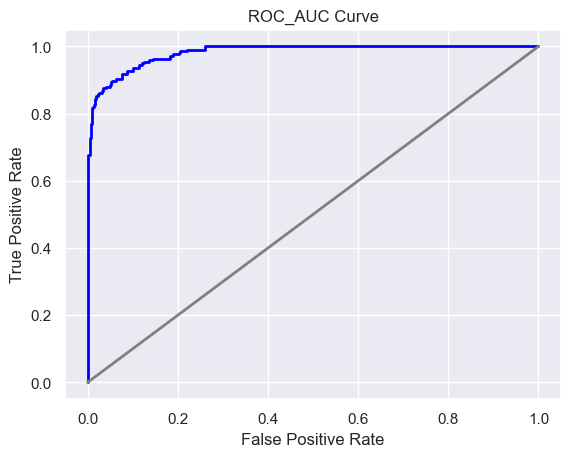

In [ ]:

params = gb_grid_search.best_params_
model = GradientBoostingClassifier(**params)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

pred = pd.DataFrame({'Actual': y_test,
                     'Prediction': y_pred})

# Avaliar o desempenho do modelo
display(pred.head())
display(pred.tail())
print('='*65)
print(classification_report(y_test, y_pred))
print('='*65)
print()



yprob= model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, yprob)
plt.plot(fpr, tpr, lw=2, color='blue')
plt.plot([0,1], [0,1], lw=2, color='gray')
plt.title("ROC_AUC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show();

Olhando os resultados, podemos dizer que o algoritmo de predição funciona bem. Como todo modelo, há erros, mas as quantidades são baixas.

In [ ]:
## Calcular a impotância de cada variável na classificação

feature_importance = model.feature_importances_
column_names = X.columns.tolist()

weight = pd.DataFrame(feature_importance, index=column_names)
weight['importance %'] = weight[0].map('{:.2%}'.format)
weight.columns = ['importance', 'importance %']
weight = weight.sort_values('importance', ascending=False)
weight.head()


,importance,importance %
Lifetime,0.422170,42.22%
Avg_class_frequency_current_month,0.182510,18.25%
Avg_class_frequency_total,0.120365,12.04%
Age,0.116540,11.65%
Month_to_end_contract,0.103972,10.40%


A Variável Lifetime é a Variável com mais peso, antes foi mostrado que ela possuia a maior correlação negativa entre as variáveis, ela se mostrou importante no processo de decisão. 

<Figure size 800x600 with 0 Axes>

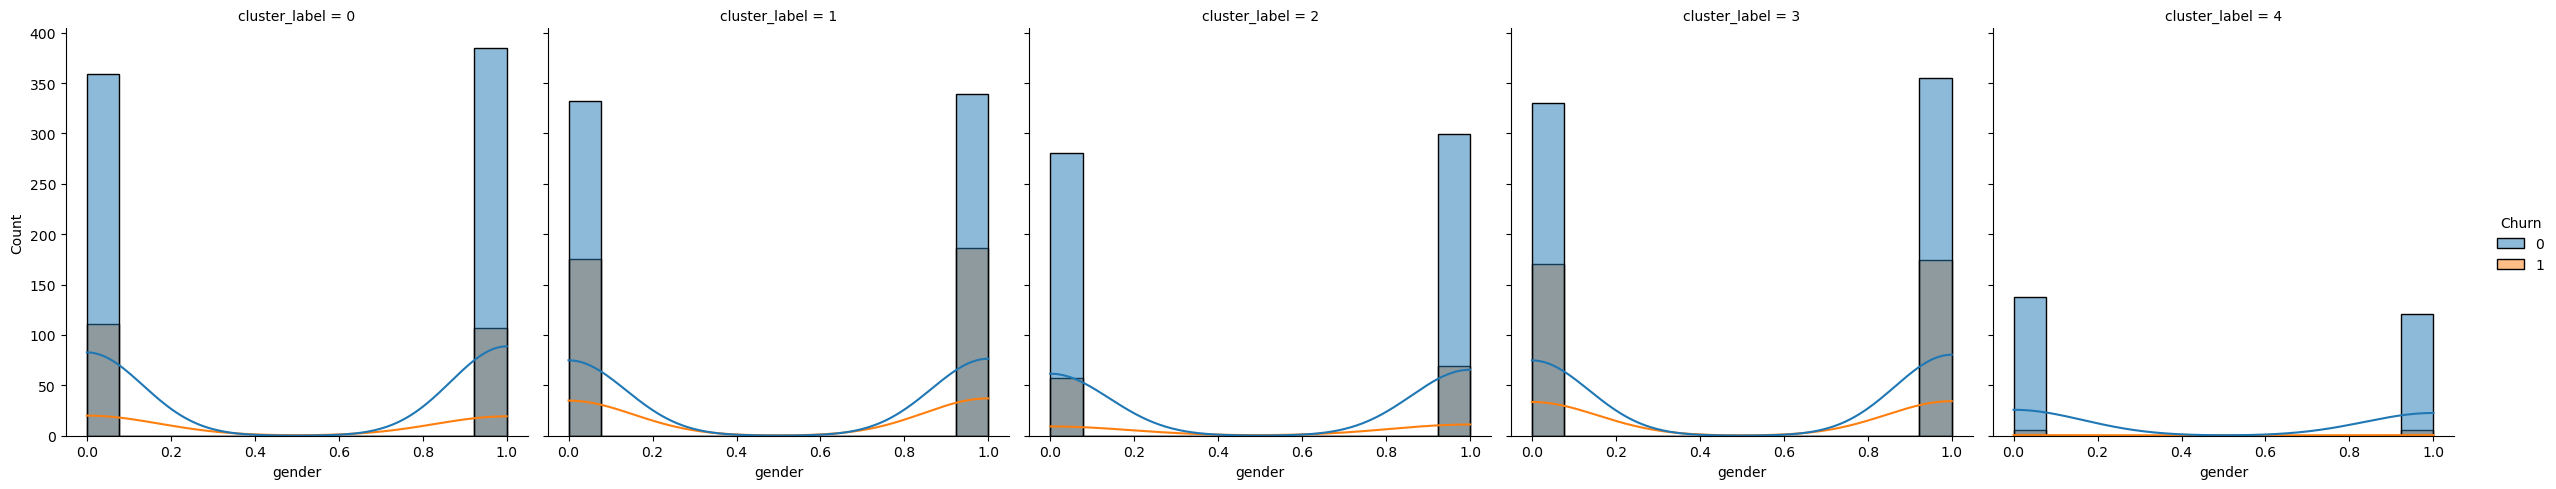

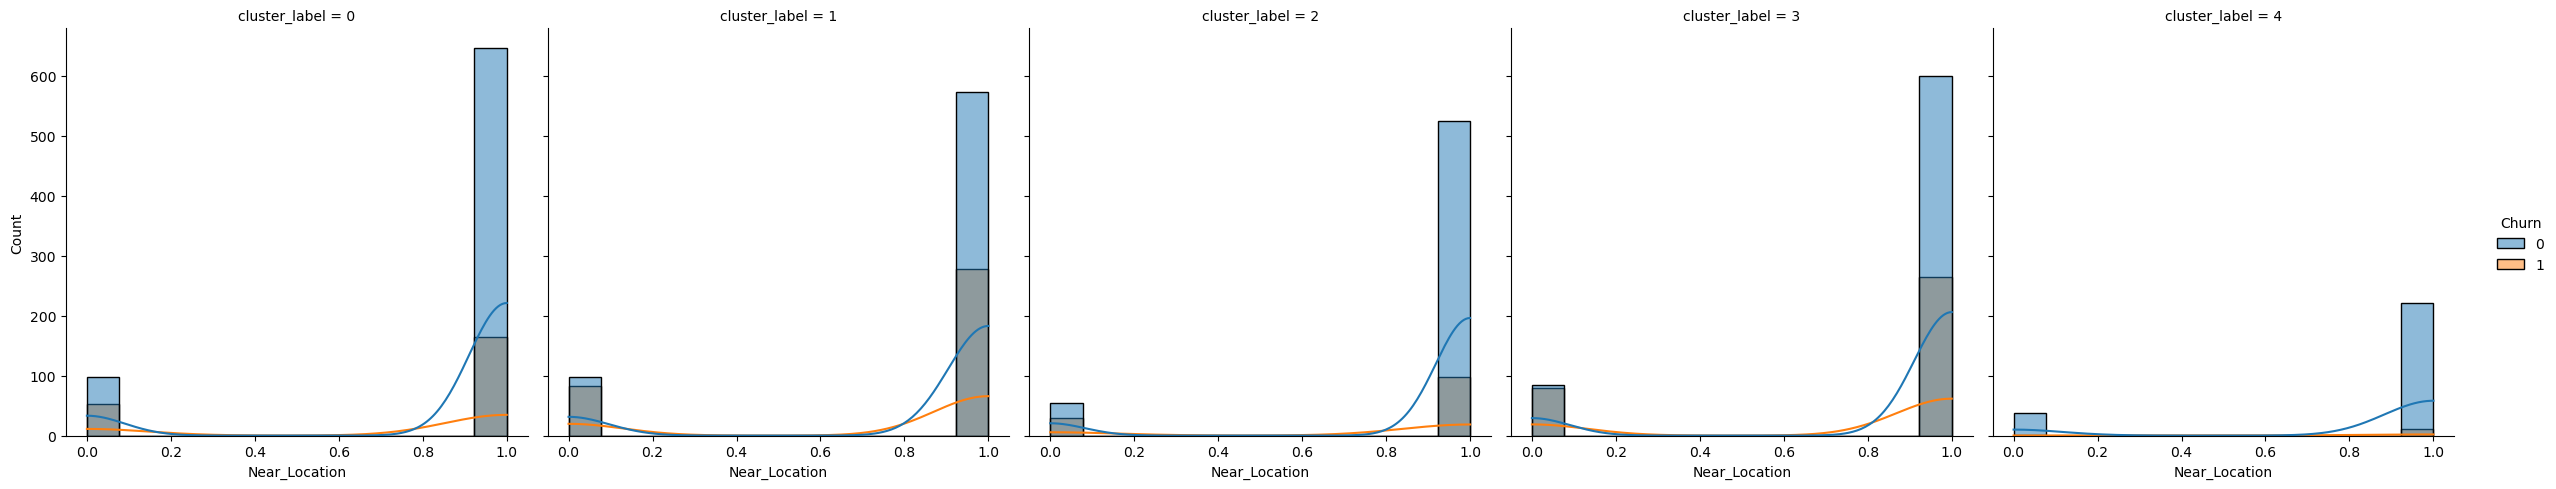

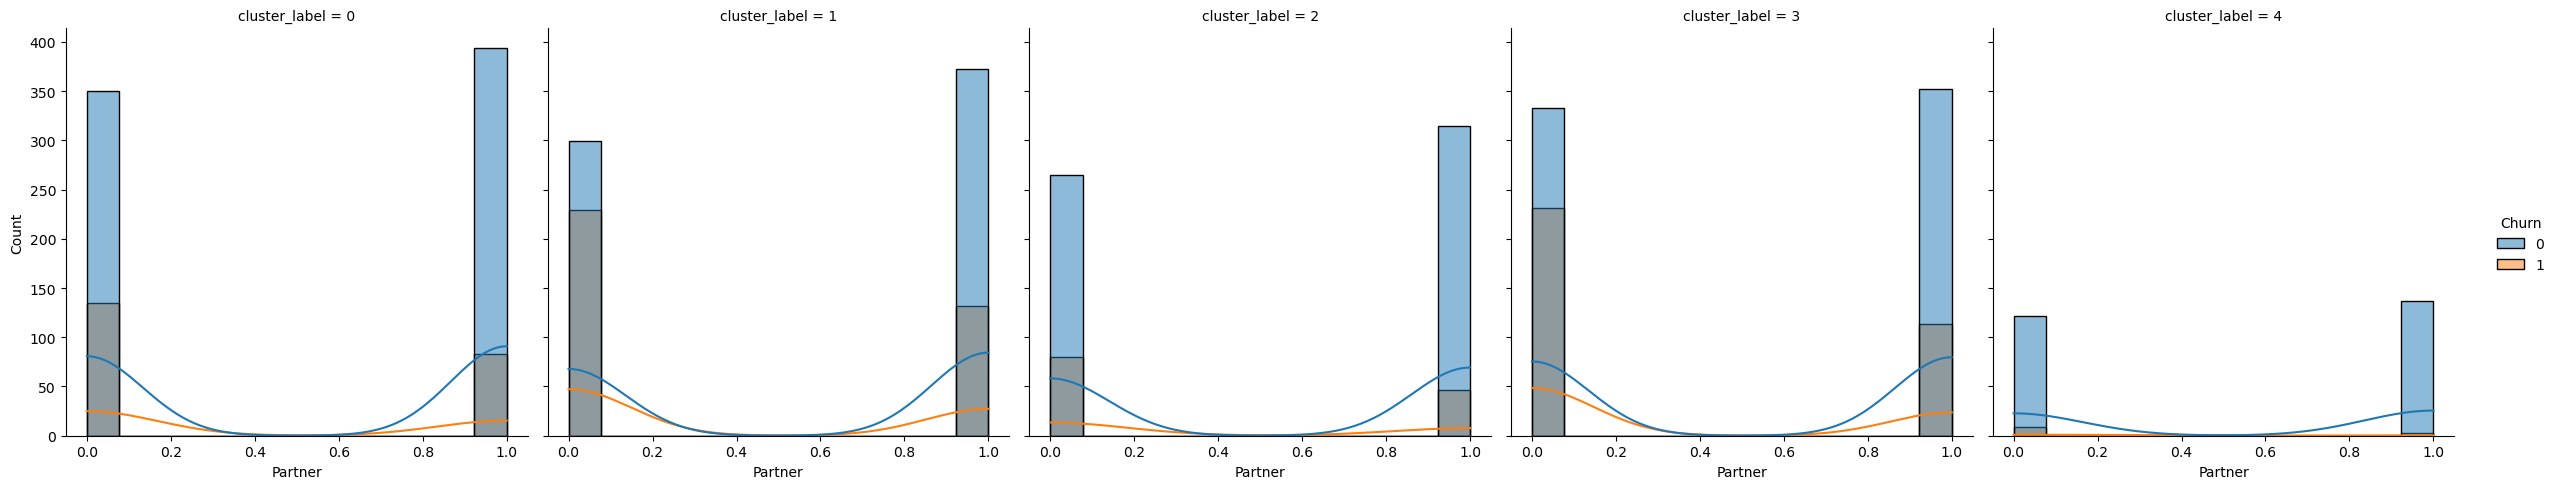

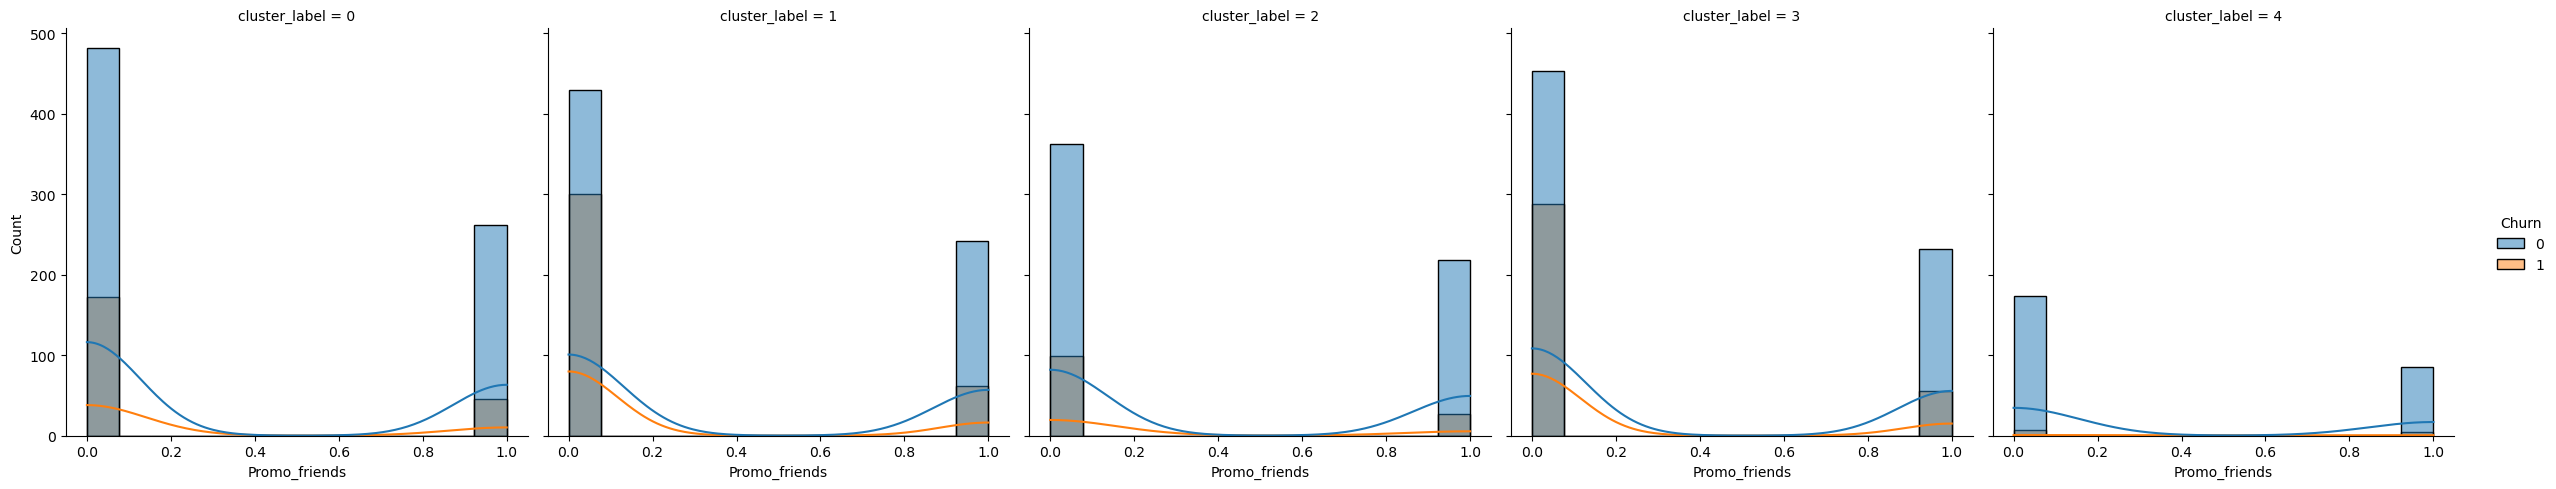

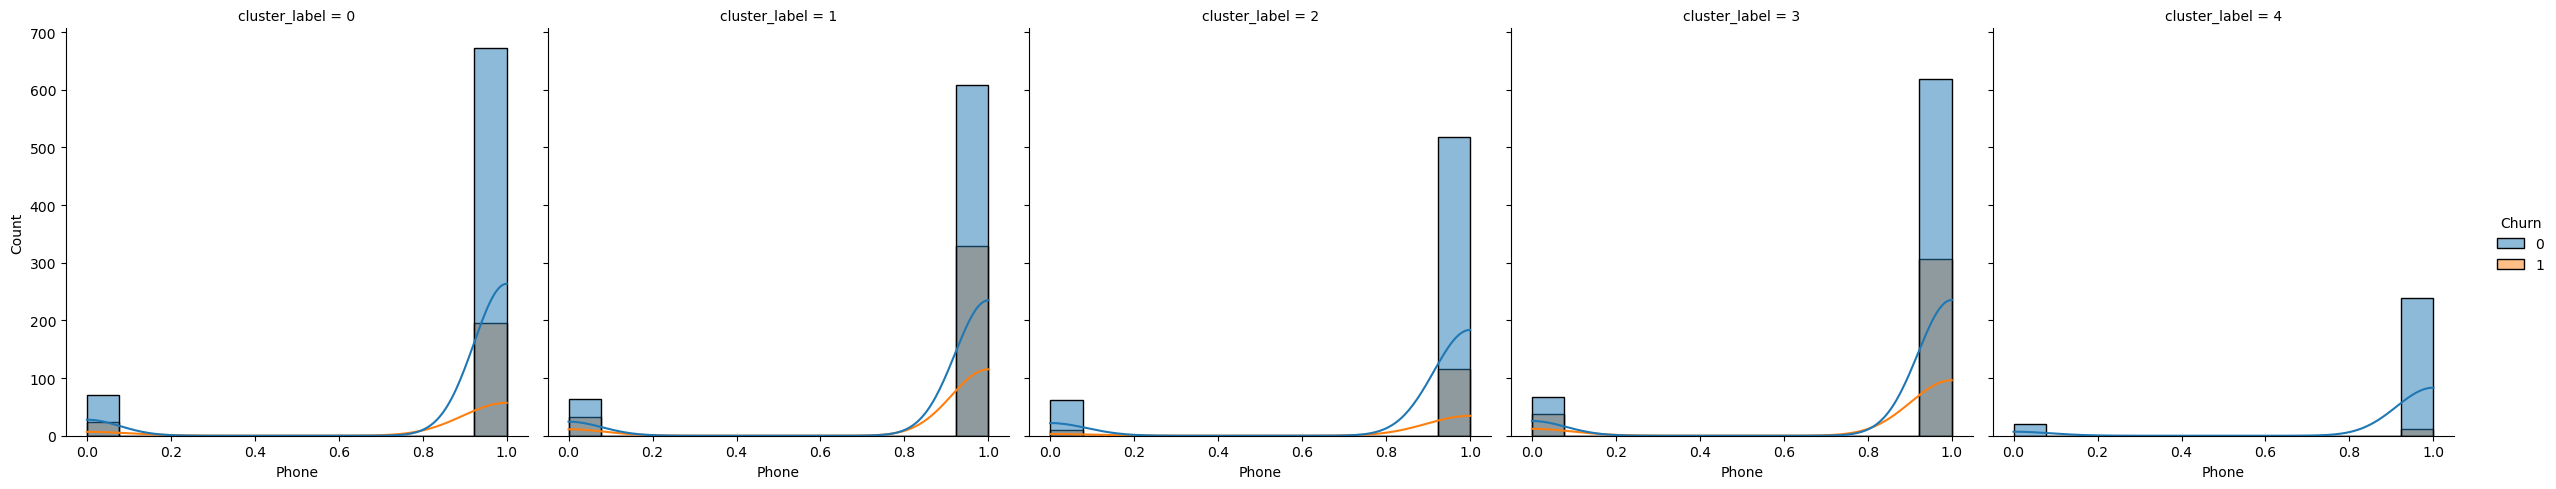

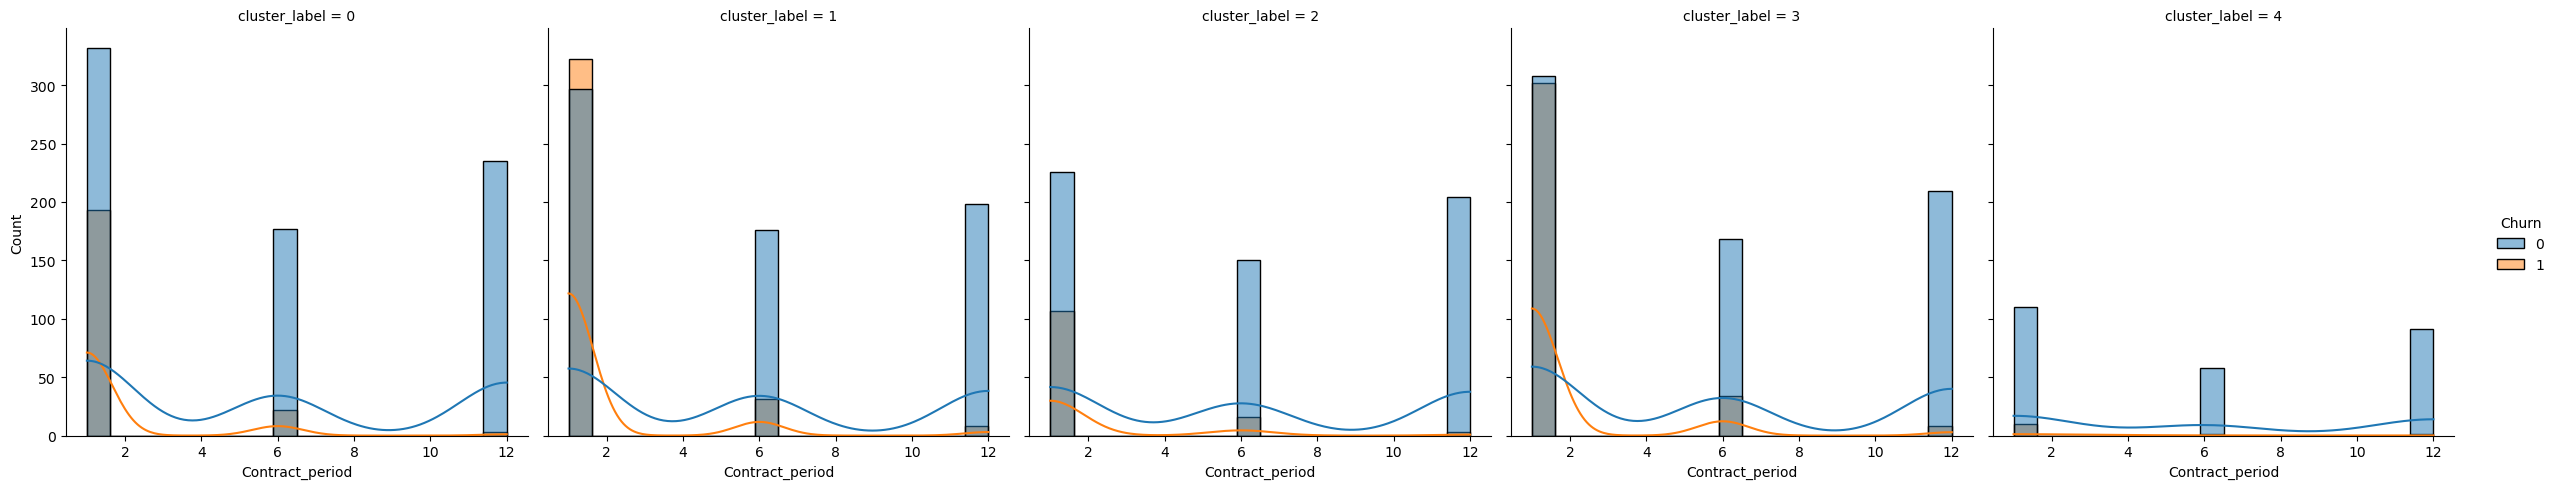

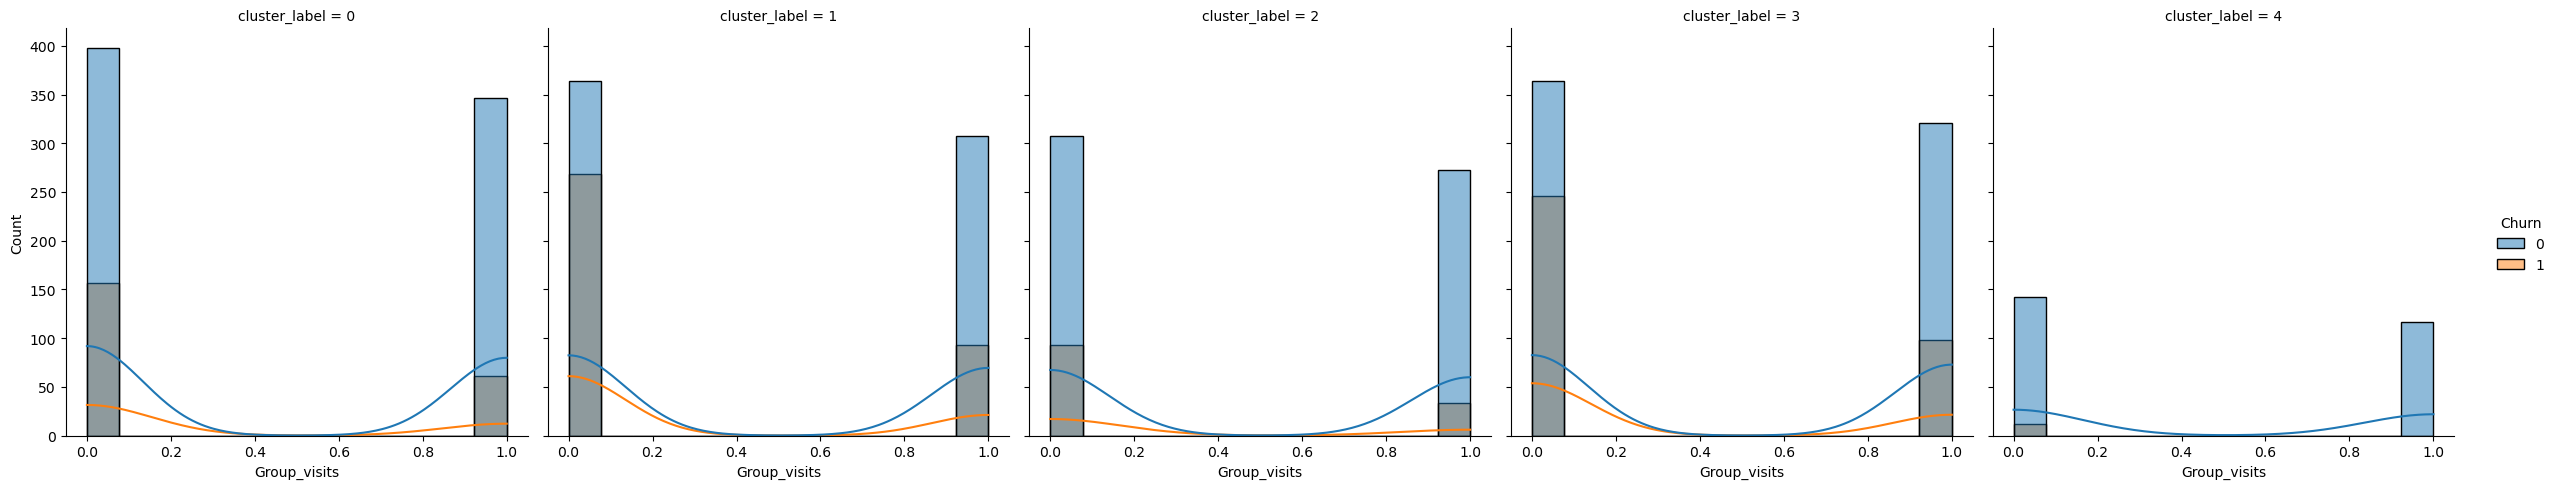

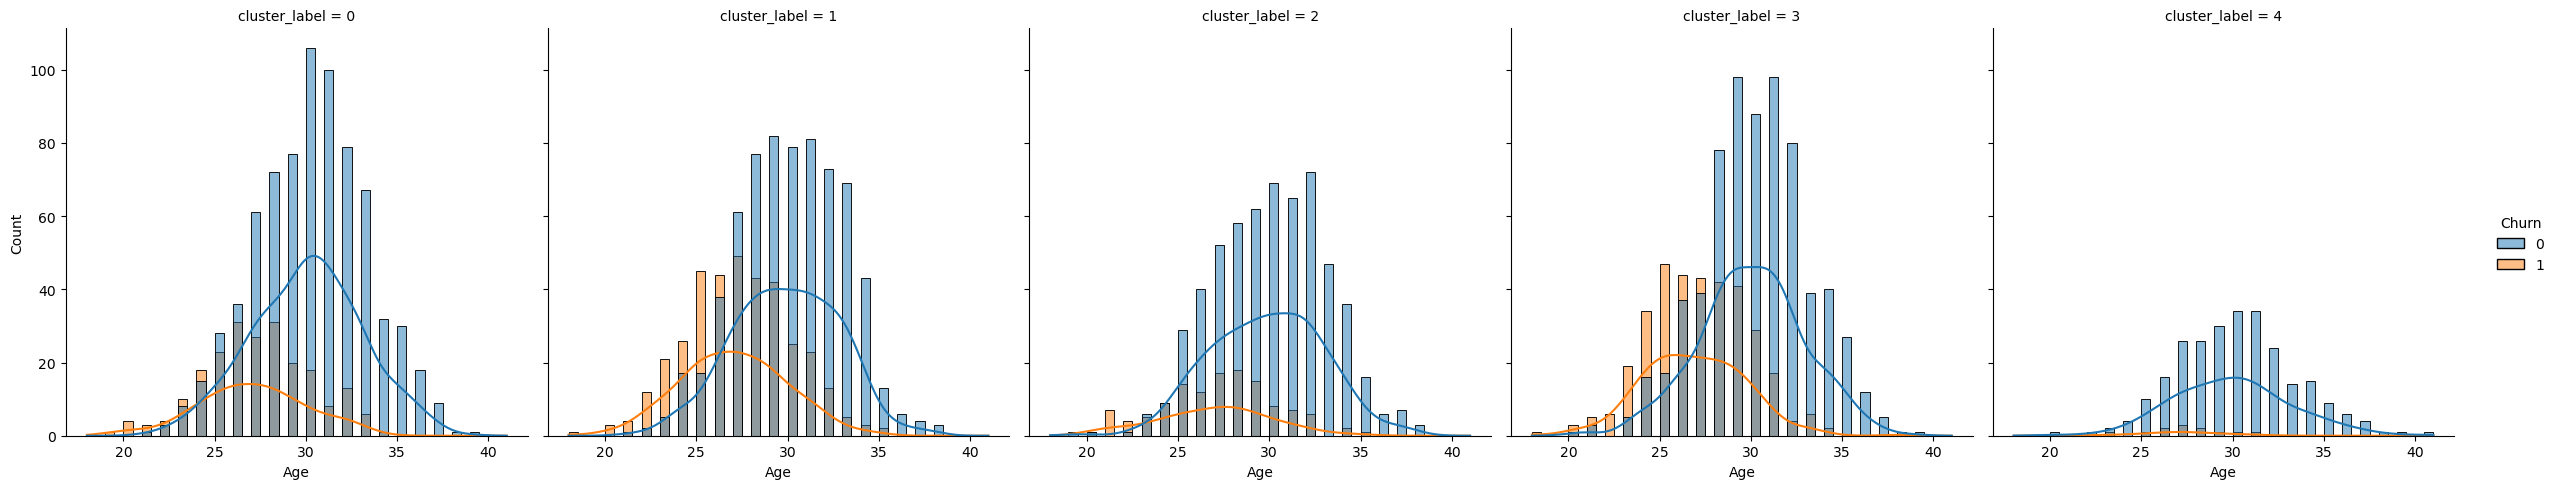

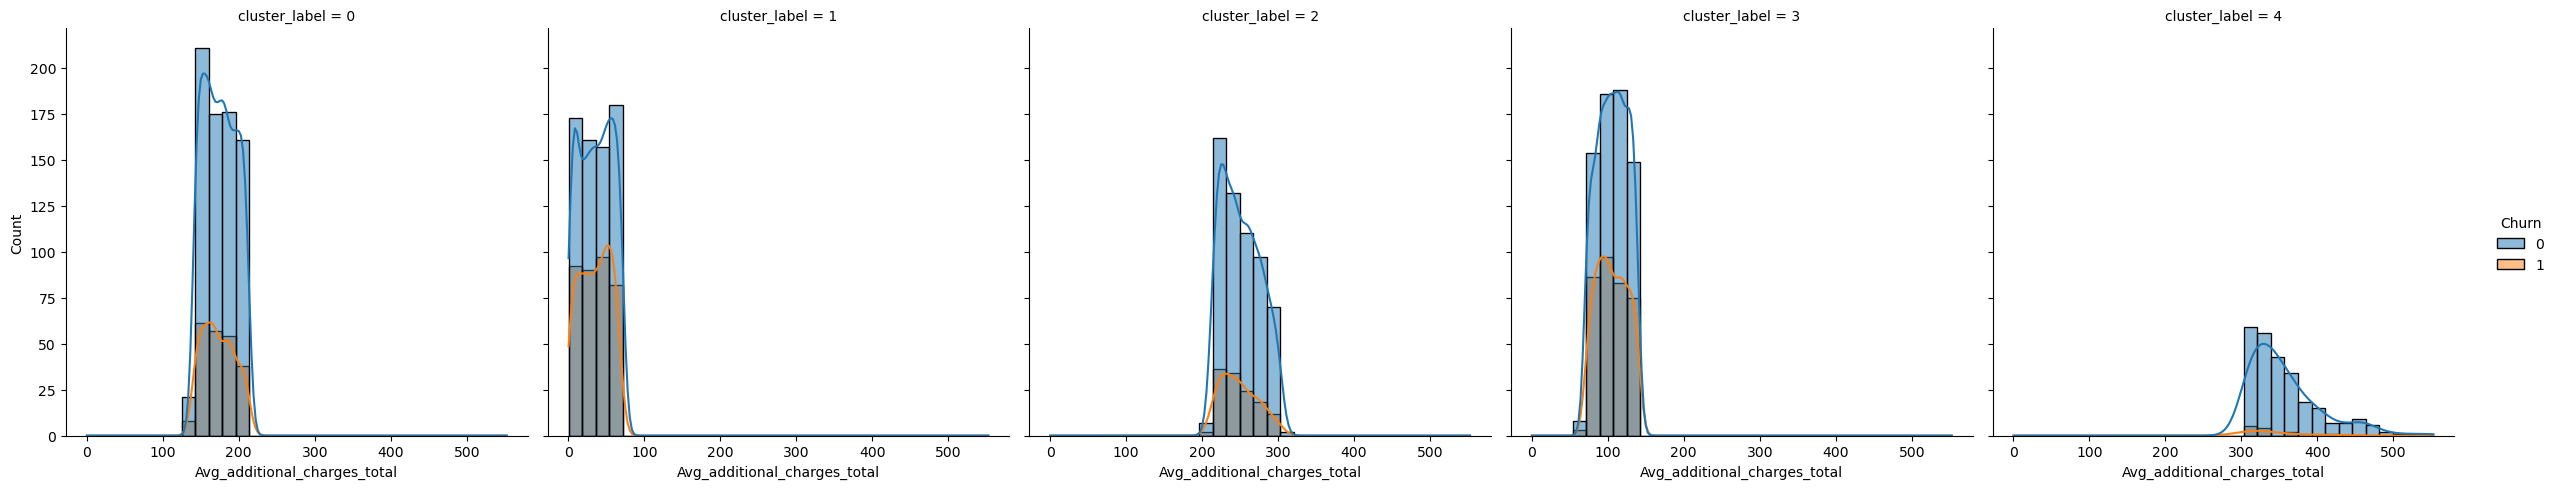

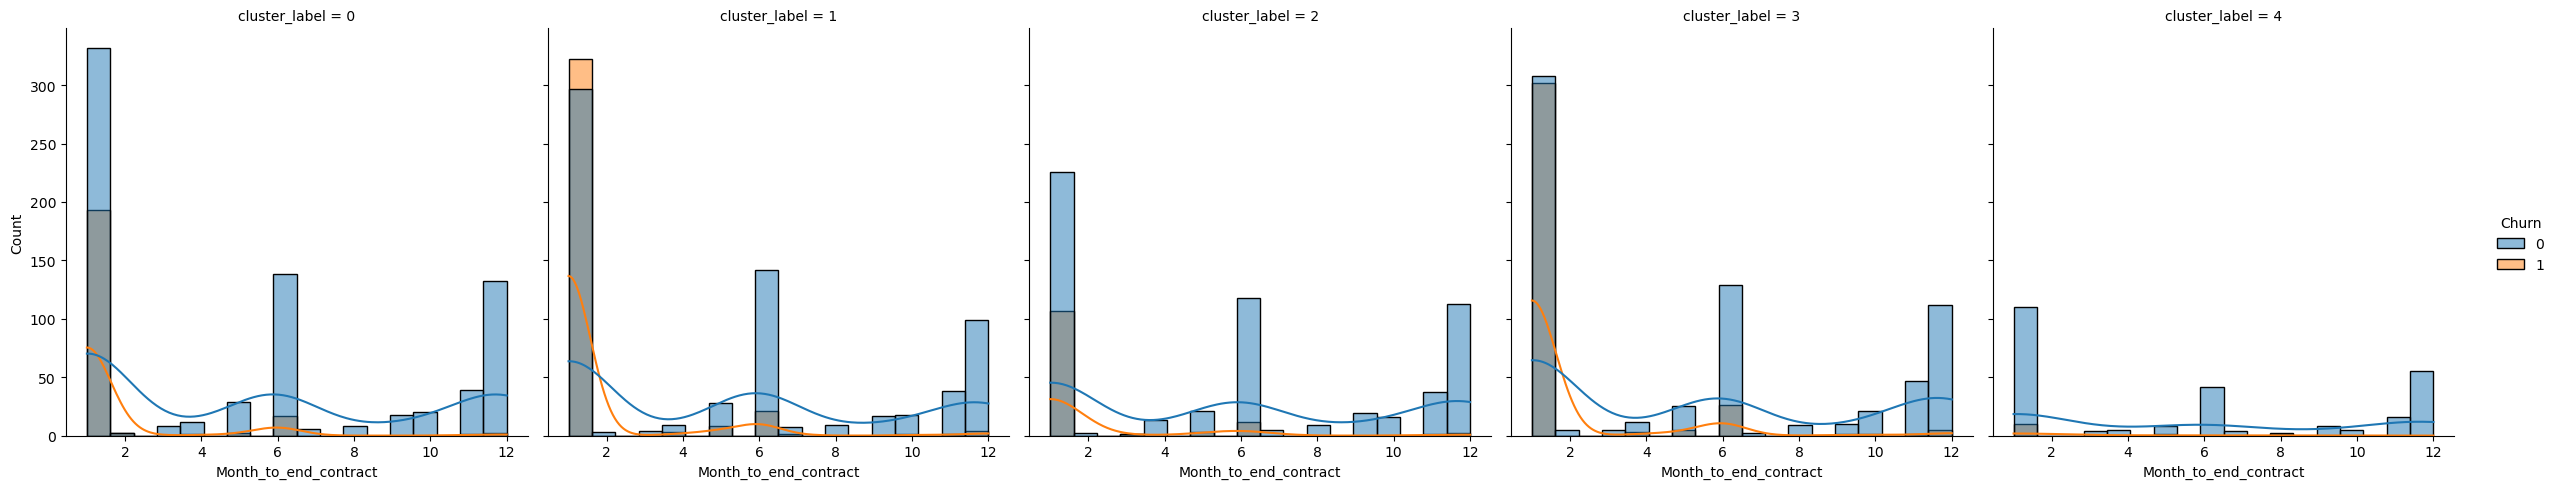

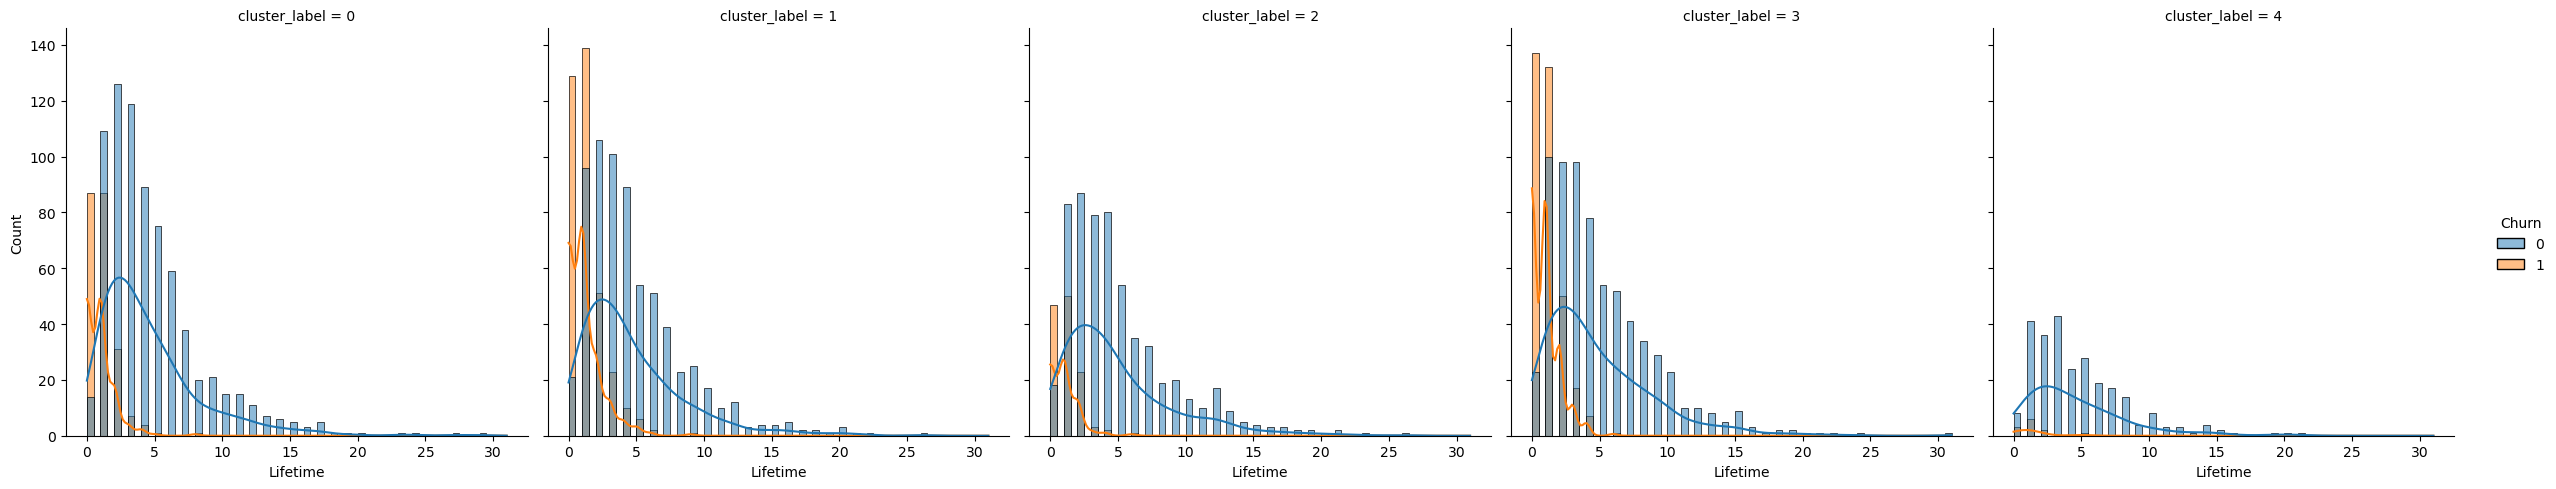

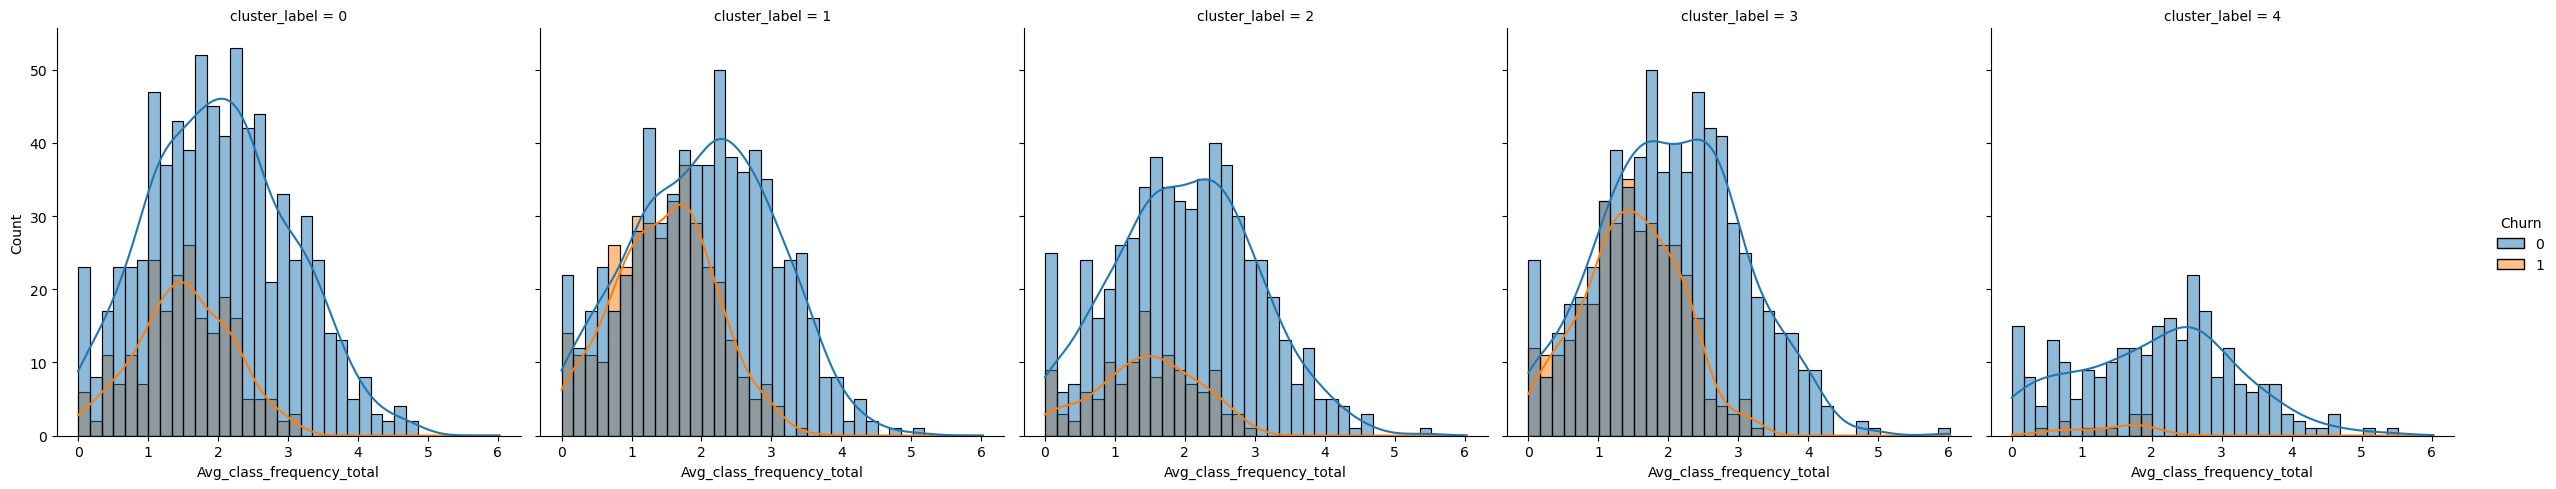

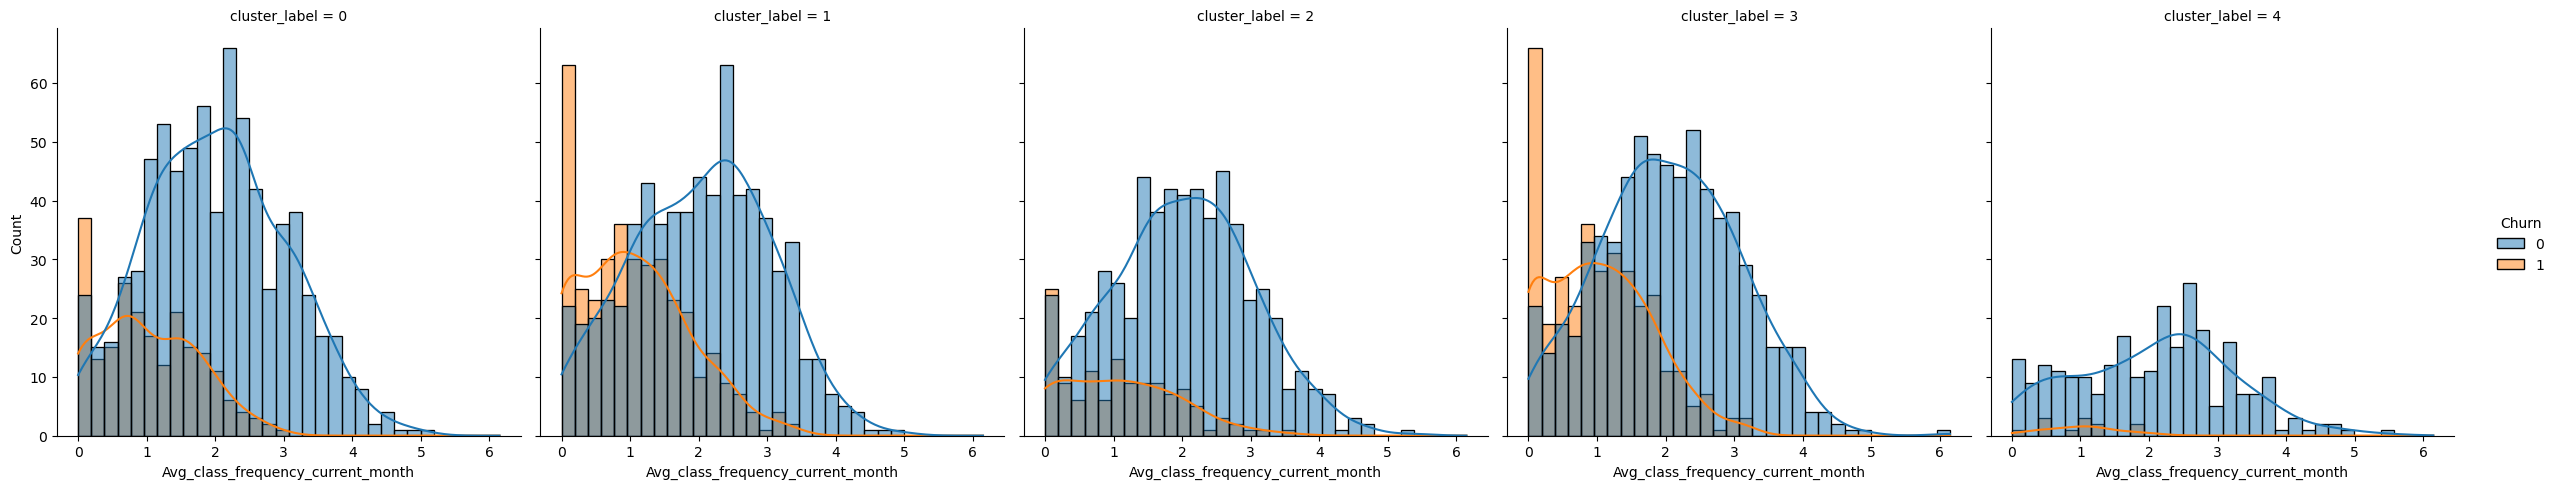

In [ ]:
plt.figure(figsize=(10,8))

for column in df.drop(['Churn', 'cluster_label'], axis=1).columns:
    sns.displot(data=df, x=column, col='cluster_label', hue='Churn', kde=True)
    plt.show();

# Conclusão

Baseado nas análises feitas, devemos reforçar que a quantidade de 27% de saídas de clientes em um único mês é um valor muito alto para deixar passar despercebido. Fez-se necessário uma estratégia de retenção desses clientes, incluindo aqueles que foram classificado no grupo de risco. 

Deve-se reforçar a retenção de clientes, focando em fazê-los permanecer um periodo maior, para que eles permaneçam, devemos lembrar que exercício físico é penoso para muitos e é desconfortável, portanto deve-se tornar o processo mais leve e prazeroso para o cliente. 

Observa-se que os clientes que participam de atividades em grupo e os que foram indicados por amigos, tem uma taxa de saída menor.

Clientes mais novos, possuem uma taxa de saída maior, enquanto os que possuem mais idade tendem a permanecer mais tempo.

Baseado nessas análises foi feita um classificação e agrupamento dos clientes em grupos. Essa classificação poderá ajudar a entender o comportamento dos clientes e traçar perfis de risco.
Com esses dados em mãos, a academia poderá criar estratégias personalizadas para cada tipo de cliente, ou grupo. Com isso, poderá aumentar sua receita e sua taxa de retenção.

